# Линейная алгебра. Лабораторная работа 1, осень 2024


## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [46]:
# Запустите этот код
import numpy as np
import copy as cp
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [48]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется по умолчанию *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://numpy.org/doc/stable/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать, аналогичных slicing для списков базового Python, но отчасти расширяющих их (при желании см. [документацию](https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing)):
- элемент с номером `(i,j)`: `A[i,j]`; <small>*работает и `A[i][j]`, но менее эффективно (создаётся промежуточный одномерный массив `A[i]`, прежде чем взять из него j-й элемент)*</small>
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

Обратите внимание, что эти методы как правило возвращают view, а не copy (<small>*есть исключения, при желании см. [advanced-indexing](https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing)*</small>), то есть если, например, изменить что-то в `A[i, :]`, то изменится исходная матрица `A`.

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. <small>*Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`. Не путать с `sla.expm(A)` – настоящей матричной экспонентой.*</small>

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`.

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.25 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте нулевую матрицу $Y$ размера $4\times1$ и найдите произведение $ZY$;

- создайте диагональную матрицу $D$ размера $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след $\operatorname{tr}(D)$ (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу $D^{-1}$;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте выводить результаты.

In [49]:
# Создание нулевой матрицы Z 3x4
Z = np.zeros((3, 4))
print("Z =\n", Z)

Z =
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [50]:
# Создание нулевой матрицы Y 4x1 и выполнение произведения ZY
Y = np.zeros((4, 1))
print("Y =\n", Y)
print("ZY =\n", Z @ Y)

Y =
 [[0.]
 [0.]
 [0.]
 [0.]]
ZY =
 [[0.]
 [0.]
 [0.]]


In [51]:
# Создание диагональной матрицы D 5x5 с элементами 1,2,3,4,5
D = np.diag([1, 2, 3, 4, 5])
print("D =\n", D)

D =
 [[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [52]:
# Поиск следа матрицы D
trace_D = np.trace(D)
print("trD =", trace_D)

trD = 15


In [53]:
# Поиск обратной матрицы D
D_inv = np.linalg.inv(D)
print("D^(-1) =\n", D_inv)

D^(-1) =
 [[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]


In [54]:
# Генерация случайной матрицы X 4x5
X = np.random.rand(4, 5)
print("X =\n", X)

X =
 [[0.77484517 0.17582739 0.06827976 0.85450529 0.51471806]
 [0.58275349 0.46217539 0.72340008 0.00890703 0.41580262]
 [0.55988615 0.9231902  0.33204033 0.47562312 0.24101177]
 [0.60369387 0.11130154 0.33866226 0.01405334 0.43453829]]


In [55]:
# Поиск определитель подматрицы матрицы X, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов
minor = np.linalg.det(X[1:3, 0:2])
print("Minor =", minor)

Minor = 0.27922670556117035


In [56]:
# Поиск произведения X^T * X
XTX = X.T @ X
print("X^T * X =\n", XTX)

X^T * X =
 [[1.61790545 0.98964678 0.86482327 0.94207861 1.03840448]
 [0.98964678 1.10918953 0.69057318 0.5950168  0.55353975]
 [0.86482327 0.69057318 0.75291272 0.22747415 0.56312382]
 [0.94207861 0.5950168  0.22747415 0.95667347 0.56427035]
 [1.03840448 0.55353975 0.56312382 0.56427035 0.6847367 ]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете. Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками.

**Задание 2.1 [0.1 балла]**
Для разминки реализуйте одно элементарное преобразование: прибавьте третью строку данной матрицы ко второй с коэффициентом 3. Не используйте циклов; для естественного решения достаточно одной строки.

In [57]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.float64)
print("A до изменения=\n", A)
A[1,:] += 3 * A[2,:]
print("A после изменения=\n", A)

A до изменения=
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
A после изменения=
 [[ 1.  2.  3.]
 [25. 29. 33.]
 [ 7.  8.  9.]]


**Задание 2.2 [0.2 балла]** Теперь напишите функцию, принимающую на вход матрицу и находящую номер первого слева ненулевого столбца. Предусмотрите случай, что на вход подана нулевая матрица (например, удобно вывести ответ «-1» в таком случае).

In [58]:
def find_first_nonzero_column (A):
  """
  Функция находит индекс первого ненулевого столбца матрицы
  
  Параметры:
  A : numpy.ndarray - входная матрица
  
  Возвращает:
  int - индекс первого ненулевого столбца или -1, если матрица нулевая
  """

  # Поиск всех ненулевых элементов по столбцам.
  nonzero_cols = np.any(A != 0, axis=0)

  # Определение индексов ненулевых столбцов.
  nonzero_indices = np.nonzero(nonzero_cols)[0]

  # Индекс первого ненулевого столбца. Иначе, -1.
  return nonzero_indices[0] if nonzero_indices.size > 0 else -1

In [59]:
# Test cases
A1 = np.array([[0, 0, 1], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"First non-zero column of A1: {find_first_nonzero_column(A1)}")  # Expected output: 2

A2 = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"First non-zero column of A2: {find_first_nonzero_column(A2)}")  # Expected output: -1

A3 = np.array([[0, 1, 0], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"First non-zero column of A3: {find_first_nonzero_column(A3)}")  # Expected output: 1

A4 = np.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"First non-zero column of A4: {find_first_nonzero_column(A4)}")  # Expected output: 0

A5 = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.float64)
print(f"First non-zero column of A5: {find_first_nonzero_column(A5)}") # Expected output: 0

First non-zero column of A1: 2
First non-zero column of A2: -1
First non-zero column of A3: 1
First non-zero column of A4: 0
First non-zero column of A5: 0


**Задание 2.3 [0.3 балла]** Теперь напишите функцию, меняющую при необходимости строки матрицы местами так, чтобы в первом ненулевом столбце на первом месте было ненулевое число. Функция должна изменять исходную матрицу и возвращать число $\pm 1$ в зависимости от того, был ли произведен обмен строк местами.

In [60]:
def swap_rows_if_needed (A):
  """
  Функция меняет строки матрицы так, чтобы в первом ненулевом столбце
  на первом месте было ненулевое число
  
  Параметры:
  A : numpy.ndarray - входная матрица
  
  Возвращает:
  int - 1 если перестановка не требовалась, -1 если была выполнена перестановка
  """
  
  # Поиск первого ненулевого столбца.
  k = find_first_nonzero_column(A)
  
  # Если матрица нулевая или первый элемент в столбце k ненулевой,
  # то перестановка не нужна. Выход с кодом 1.
  if k == -1 or A[0, k] != 0:
    return 1

  # Поиск индексов ненулевых элементов в k-м столбце, начиная с первой строки.
  nonzero_rows = np.nonzero(A[1:, k])[0]

  # Если найден ненулевой элемент - перестановка строк местами.
  if nonzero_rows.size > 0:
    # nonzero_rows[0] + 1 потому, что искали со среза A[1:, k]
    i = nonzero_rows[0] + 1
    A[0,:], A[i,:] = A[i,:].copy(), A[0,:].copy()
    return -1
  
  return 1

In [61]:
# Test cases
A1 = np.array([[0, 0, 1], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"Original A1:\n{A1}")
print(f"swap_rows_if_needed(A1): {swap_rows_if_needed(A1)}") # Expected output: 1
print(f"Modified A1:\n{A1}")

A2 = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"Original A2:\n{A2}")
print(f"swap_rows_if_needed(A2): {swap_rows_if_needed(A2)}") # Expected output: 1
print(f"Modified A2:\n{A2}")

A3 = np.array([[0, 1, 0], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"Original A3:\n{A3}")
print(f"swap_rows_if_needed(A3): {swap_rows_if_needed(A3)}") # Expected output: 1
print(f"Modified A3:\n{A3}")

A4 = np.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"Original A4:\n{A4}")
print(f"swap_rows_if_needed(A4): {swap_rows_if_needed(A4)}") # Expected output: -1
print(f"Modified A4:\n{A4}")

A5 = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.float64)
print(f"Original A5:\n{A5}")
print(f"swap_rows_if_needed(A5): {swap_rows_if_needed(A5)}") # Expected output: 1
print(f"Modified A5:\n{A5}")

A6 = np.array([[0,2,3],[4,5,6],[7,8,9]], dtype=np.float64)
print(f"Original A6:\n{A6}")
print(f"swap_rows_if_needed(A6): {swap_rows_if_needed(A6)}") # Expected output: -1
print(f"Modified A6:\n{A6}")

print(f"Original slice:\n{A6[1:,1:]}")
print(f"swap_rows_if_needed(A6): {swap_rows_if_needed(A6[1:,1:])}") # Expected output: 1
print(f"Modified slice:\n{A6[1:,1:]}")

Original A1:
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
swap_rows_if_needed(A1): 1
Modified A1:
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
Original A2:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
swap_rows_if_needed(A2): 1
Modified A2:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Original A3:
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
swap_rows_if_needed(A3): 1
Modified A3:
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Original A4:
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
swap_rows_if_needed(A4): -1
Modified A4:
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Original A5:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
swap_rows_if_needed(A5): 1
Modified A5:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
Original A6:
[[0. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
swap_rows_if_needed(A6): -1
Modified A6:
[[4. 5. 6.]
 [0. 2. 3.]
 [7. 8. 9.]]
Original slice:
[[2. 3.]
 [8. 9.]]
swap_rows_if_needed(A6): 1
Modified slice:
[[2. 3.]
 [8. 9.]]


**Задание 2.4 [0.4 балла]** Теперь напишите функцию, принимающую на вход матрицу и номер строки $j$, и вычитающую первую строку из $j$-й с некоторым коэффициентом так, чтобы первый ненулевой элемент строки $j$ занулился. Функция должна изменять данную матрицу. Предполагайте данным, что в первой строке содержится в нужном столбце ненулевой элемент.

In [62]:
def simplify_row (A, j):
  """
  Функция вычитает первую строку из j-й строки с таким коэффициентом,
  чтобы первый ненулевой элемент j-й строки стал равен нулю
  
  Параметры:
  A : numpy.ndarray - входная матрица
  j : int - номер строки для обработки
  """
  # Поиск первого ненулевого столбца в первой строке.
  k = find_first_nonzero_column(A[0:1,:])
  
  # Если такого столбца нет или элемент в первой строке нулевой, выход/прерывание.
  if k == -1 or A[0,k] == 0:
    return
  
  # Вычисление коэффициента.
  coef = A[j,k] / A[0,k]
  
  # Из заданной j-й строки вычитание первой, умноженной на коэффициент.
  A[j,:] -= coef * A[0,:]

In [63]:
# Test cases
A1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=np.float64)
simplify_row(A1, 1)
print(A1)  # Expected output: [[1,2,3],[0,-3,-6],[7,8,9]]

A2 = np.array([[1, 0, 3], [4, 5, 6], [7, 8, 9]], dtype=np.float64)
simplify_row(A2, 1)
print(A2)  # Expected output: [[1,0,3],[0,5,-6],[7,8,9]]

A3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=np.float64)
simplify_row(A3, 2)
print(A3)  # Expected output: [[1,2,3],[4,5,6],[0,-6,-12]]

A4 = np.array([[1, 2, 3], [1, 2, 3], [7, 8, 9]], dtype=np.float64)
simplify_row(A4, 1)
print(A4) # Expected output: [[1,2,3],[0,0,0],[7,8,9]]

A5 = np.array([[0, 2, 3], [0, 5, 6], [0, 8, 9]], dtype=np.float64)
simplify_row(A5, 1)
print(A5) # Expected output: [[0,2,3],[0,0,-1.5],[0,8,9]]

[[ 1.  2.  3.]
 [ 0. -3. -6.]
 [ 7.  8.  9.]]
[[ 1.  0.  3.]
 [ 0.  5. -6.]
 [ 7.  8.  9.]]
[[  1.   2.   3.]
 [  4.   5.   6.]
 [  0.  -6. -12.]]
[[1. 2. 3.]
 [0. 0. 0.]
 [7. 8. 9.]]
[[ 0.   2.   3. ]
 [ 0.   0.  -1.5]
 [ 0.   8.   9. ]]


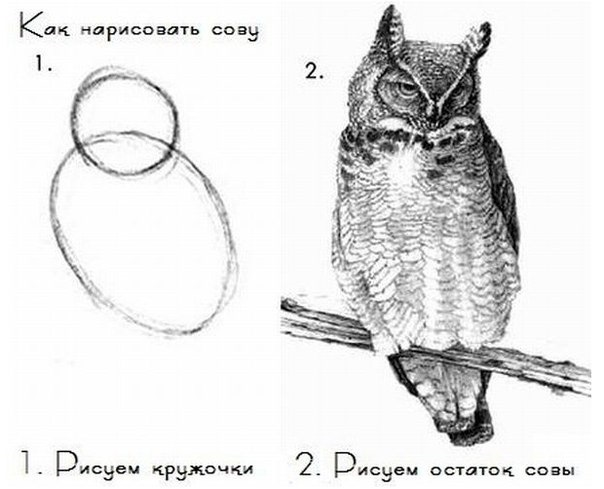

**Задание 2.5 [1 балл]**
Теперь реализуйте функцию `my_det`, вычисляющую определитель. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной. Функция не должна быть деструктивной – исходная матрица не должна измениться.

In [64]:
def my_det(X):
  """
  Вычисляет определитель матрицы методом Гаусса
  
  Параметры:
  X : numpy.ndarray - входная матрица
  
  Возвращает:
  float - определитель матрицы
  
  Исключения:
  ValueError - если матрица не квадратная
  """

  # Проверка инварианта.
  n = X.shape[0]
  if X.shape[1] != n:
    raise ValueError("Матрица должна быть квадратной")
    
  # Использование LU-разложения
  try:
    # P - матрица перестановок, L - нижнетреугольная, U - верхнетреугольная
    P, L, U = sla.lu(X)
    
    # Определитель равен произведению диагональных элементов U
    # умноженному на определитель матрицы перестановок
    return np.prod(np.diag(U)) * np.linalg.det(P)
    
  except:
    # Если матрица вырожденная
    return 0.0

Простая проверка:

In [65]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]], dtype=np.float64)
print(my_det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [66]:
# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print(X)
        print(my_det(X))
        print(sla.det(X))
        print('FAILED')

[[0.65981133 0.74332942 0.28744934 ... 0.67019912 0.33078161 0.70453011]
 [0.05681201 0.73323794 0.97020359 ... 0.74522088 0.46839185 0.98702118]
 [0.88074023 0.03234749 0.34901157 ... 0.40977807 0.93247527 0.22568827]
 ...
 [0.42770672 0.61222973 0.55670164 ... 0.84990429 0.74265773 0.71952652]
 [0.05228239 0.46453901 0.23223568 ... 0.62249693 0.65390583 0.18188237]
 [0.19743624 0.09169581 0.94195629 ... 0.91841082 0.44665827 0.68857347]]
-1210631.5628956251
-1210631.5628969898
FAILED


Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

<small>Обратите внимание на способ сравнения: проверка на точное равенство не подходит из-за машинной точности; см. следующее задание.</small>

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. <small>Вопрос для размышления: зачем запускать много раз, если рассматривать только три из этих запусков?..</small> Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

3.69 μs ± 5.62 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
55.5 μs ± 90.7 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
40.1 μs ± 638 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
5.31 ms ± 8.48 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.3 ms ± 337 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


/tmp/ipykernel_16036/3943182714.py:43: RuntimeWarning: overflow encountered in scalar multiply
  det *= Y[i,i]


726 ms ± 5.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


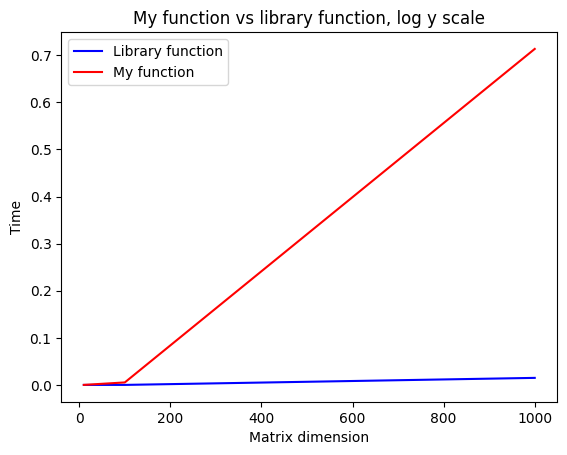

In [67]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

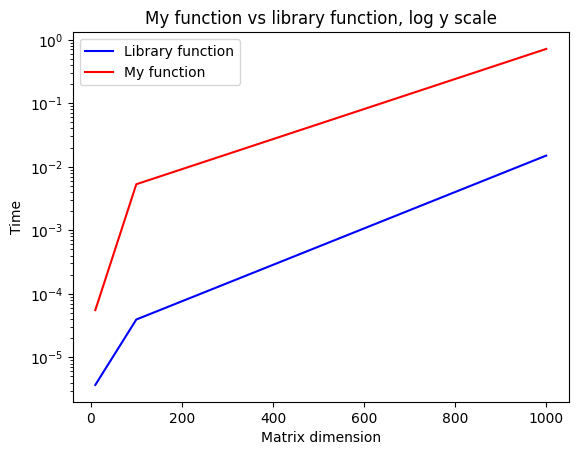

In [68]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью.

**Задание 3.1 [1 балл]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [74]:
# Создание матрицы с целыми числами
A1 = np.array([[1, 0], [10**20, 1]])
B1 = np.array([[10**(-20), 1], [0, 1 - 10**20]])

# Создание матрицы с числами с плавающей точкой
A2 = np.array([[1., 0.], [10.**20, 1.]])
B2 = np.array([[10.**(-20), 1.], [0., 1. - 10.**20]])

print("Результат умножения целочисленных матриц:")
print(A1 @ B1)
print("\nРезультат умножения матриц с плавающей точкой:")
print(A2 @ B2)

Результат умножения целочисленных матриц:
[[1e-20 1]
 [1.0 1]]

Результат умножения матриц с плавающей точкой:
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**На мой взгляд, с точки зрения математической точности, имеет смысл рассматривать результат умножения матриц с плавающей точкой.**

**Задание 3.2 [1 балл]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [88]:
def my_pascal(dim):
  """
  Функция генерирует матрицу Паскаля размера dim x dim
  
  Параметры:
  dim : int - размерность матрицы
  
  Возвращает:
  numpy.ndarray - матрица Паскаля
  """
  
  # Вычисление биномиальных коэффициентов C(i+j,i) для всей матрицы сразу.
  # Используется формула C(n,k) = n!/(k!(n-k)!).
  # Но, чтобы избежать факториалов, используются
  # логарифмы со свойством log(a/b) = log(a) - log(b):
  # log(C(n,k)) = log(n!) - (log(k!) + log((n-k)!))
  
  # Вычисление логарифмов факториалов для всех чисел от 0 до 2*dim
  log_fact = np.cumsum(np.log(np.arange(1, 2*dim)))
  log_fact = np.insert(log_fact, 0, 0)  # log(0!) = 0
  
  # Создание сетки индексов i и j
  i, j = np.ogrid[:dim, :dim]

  # Вычисление i+j для каждого элемента матрицы
  n = i + j
  
  # Вычисление логарифмы биномиальных коэффициентов.
  log_coef = log_fact[n] - log_fact[i] - log_fact[j]
  
  # Возврат экспоненты от логарифмов.
  return np.exp(log_coef)

Можно показать теоретической выкладкой, что её определитель всегда равен 1.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [89]:
P = my_pascal(30)
print("P=", P)
det = np.linalg.det(P)
print(f"Определитель: {det}")

P= [[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.00000000e+00 3.00000000e+00 4.00000000e+00
  5.00000000e+00 6.00000000e+00 7.00000000e+00 8.00000000e+00
  9.00000000e+00 1.00000000e+01 1.10000000e+01 1.20000000e+01
  1.30000000e+01 1.40000000e+01 1.50000000e+01 1.60000000e+01
  1.70000000e+01 1.80000000e+01 1.90000000e+01 2.00000000e+01
  2.10000000e+01 2.20000000e+01 2.30000000e+01 2.40000000e+01
  2.50000000e+01 2.60000000e+01 2.70000000e+01 2.80000000e+01
  2.90000000e+01 3.00000000e+01]
 [1.00000000e+00 3.00000000e+00 6.00000000e+00 1.00000000e+01
 

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в numpy лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [1 балл]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [90]:
def prod_and_sq_sum(A):
  """
  Вычисляет произведение и сумму квадратов диагональных элементов матрицы
  
  Параметры:
  A : numpy.ndarray - входная матрица
  
  Возвращает:
  tuple - (произведение диагональных элементов, сумма квадратов диагональных элементов)
  """
  # Получение диагональных элементов матрицы
  diag = np.diag(A)
  
  # Вычисление произведения диагональных элементов
  prod = np.prod(diag)
  
  # Вычисление суммы квадратов диагональных элементов
  sq_sum = np.sum(diag**2)
  
  return prod, sq_sum

In [91]:
# Тест
A = np.array([[1, 2], [3, 4]])
prod, sq_sum = prod_and_sq_sum(A)
print(f"Матрица:\n{A}")
print(f"Произведение диагональных элементов: {prod}")  # Должно быть 4
print(f"Сумма квадратов диагональных элементов: {sq_sum}")  # Должно быть 17

Матрица:
[[1 2]
 [3 4]]
Произведение диагональных элементов: 4
Сумма квадратов диагональных элементов: 17


**Задание 4.2 [1.5 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [92]:
def f(A, B, lmbd, k):
  """
  Вычисляет сумму произведений столбцов матриц с коэффициентами
  
  Параметры:
  A, B : numpy.ndarray - входные матрицы размера m x n
  lmbd : numpy.ndarray - массив коэффициентов длины n
  k : int - количество слагаемых в сумме
  
  Возвращает:
  numpy.ndarray - результат суммы произведений
  """
  # Определение минимума между k и количеством столбцов
  n = min(k, A.shape[1])
  
  # Выбор первых n столбцов из матриц A и B
  A_k = A[:, :n]
  B_k = B[:, :n]
  
  # Выбор первых n коэффициентов
  lmbd_k = lmbd[:n]
  
  # Умножение каждого столбца A на соответствующий коэффициент
  A_scaled = A_k * lmbd_k.reshape(1, -1)
  
  # Матричное произведение A_scaled на транспонированную B_k
  return A_scaled @ B_k.T

In [93]:
# Тест функции f()
# Создание тестовых матриц
A = np.array([[1, 2, 3], 
              [4, 5, 6]])

B = np.array([[7, 8, 9],
              [10, 11, 12]])

# Коэффициенты
lmbd = np.array([2, 3, 4])  

# Тест 1: k = 2 (первые два столбца)
result1 = f(A, B, lmbd, 2)
print("Тест 1 (k=2):")
print("A =\n", A)
print("B =\n", B)
print("lambda =", lmbd)
print("Результат =\n", result1)

# Тест 2: k = 3 (все столбцы)
result2 = f(A, B, lmbd, 3)
print("Тест 2 (k=3):")
print("Результат =\n", result2)

# Тест 3: k = 4 (больше, чем столбцов)
result3 = f(A, B, lmbd, 4)
print("Тест 3 (k=4):")
print("Результат =\n", result3)

# Проверка размерности результата
print("Размерности результатов:")
print("k=2:", result1.shape)
print("k=3:", result2.shape) 
print("k=4:", result3.shape)

Тест 1 (k=2):
A =
 [[1 2 3]
 [4 5 6]]
B =
 [[ 7  8  9]
 [10 11 12]]
lambda = [2 3 4]
Результат =
 [[ 62  86]
 [176 245]]
Тест 2 (k=3):
Результат =
 [[170 230]
 [392 533]]
Тест 3 (k=4):
Результат =
 [[170 230]
 [392 533]]
Размерности результатов:
k=2: (2, 2)
k=3: (2, 2)
k=4: (2, 2)


**Задание 4.3 [1.5 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком.

In [94]:
def get_diag(A, B):
  """
  Вычисляет диагональные элементы произведения матриц без полного умножения
  
  Параметры:
  A, B : numpy.ndarray - входные квадратные матрицы одного размера
  
  Возвращает:
  numpy.ndarray - вектор диагональных элементов произведения AB
  """
  
  # Диагональные элементы произведения AB можно получить как сумму 
  # произведений строк A на соответствующие столбцы B.
  # Для i-го диагонального элемента это сумма произведений i-й строки A 
  # на i-й столбец B.
  return np.sum(A * B.T, axis=1)

In [95]:
# Тест
# Создаем тестовые матрицы
A = np.array([[1, 2], 
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

# Вычисляем диагональные элементы
diag = get_diag(A, B)

# Проверяем результат
print("Матрица A:\n", A)
print("Матрица B:\n", B)
print("Диагональные элементы AB:", diag)

# Проверяем через полное умножение
C = A @ B
print("Проверка - диагональные элементы AB через полное умножение:", np.diag(C))

Матрица A:
 [[1 2]
 [3 4]]
Матрица B:
 [[5 6]
 [7 8]]
Диагональные элементы AB: [19 50]
Проверка - диагональные элементы AB через полное умножение: [19 50]


## Часть 5 (бонус). Метод Гаусса или обратные матрицы?

**Задание 5.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ – матрица размера $n\times n$, а $B$ – матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой из методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

Эксперимент 1:
11.3 μs ± 89.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.4 μs ± 16.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
32.1 μs ± 95.8 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
33.9 μs ± 37.7 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
86.5 μs ± 122 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
629 μs ± 45.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
354 μs ± 2.62 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.41 ms ± 753 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.49 ms ± 19.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.72 ms ± 1.68 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.8 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
31.6 ms ± 15.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


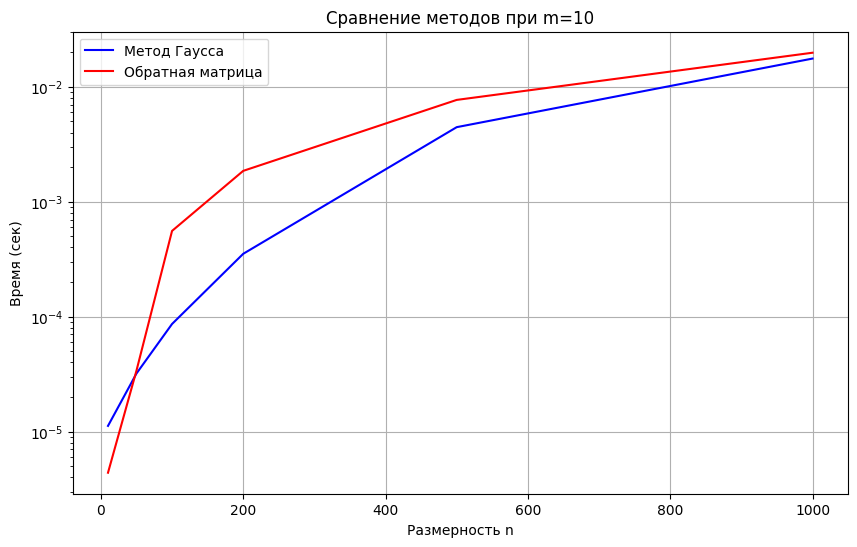


Эксперимент 2:
89.9 μs ± 426 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
730 μs ± 170 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
207 μs ± 39.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
731 μs ± 243 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
335 μs ± 67 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
710 μs ± 106 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
532 μs ± 182 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
958 μs ± 253 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
710 μs ± 99.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.08 ms ± 473 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.58 ms ± 201 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.12 ms ± 238 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.9 ms ± 225 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.07 ms ± 138 μs per loop (mean ± std. dev. of

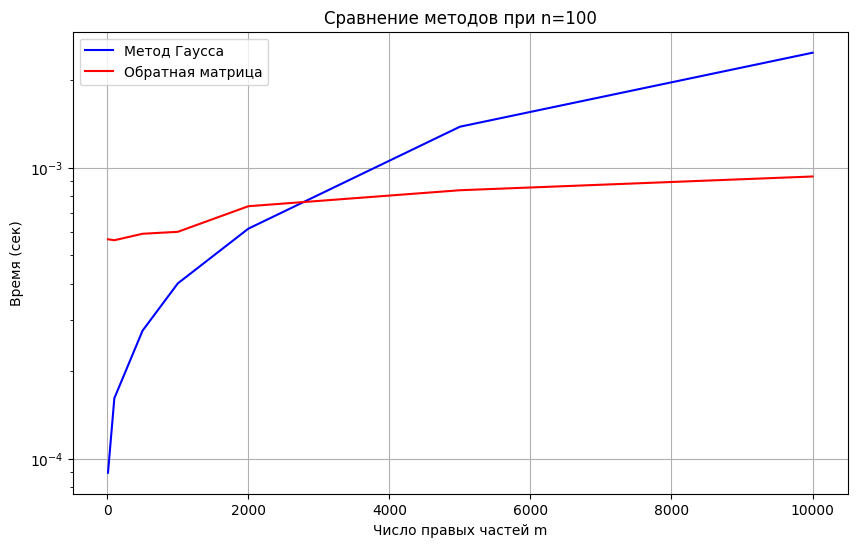

'\nАнализ результатов:\n\n1. При фиксированном m=10:\n- Метод Гаусса показывает лучшую производительность для малых n\n- С ростом n разница становится менее заметной\n- Сложность метода Гаусса O(n^3) для одной системы\n- Сложность обратной матрицы O(n^3) + O(n^2*m)\n\n2. При фиксированном n=100:\n- Метод Гаусса эффективнее при малом числе правых частей\n- При большом m метод обратной матрицы становится выгоднее\n- Это объясняется тем, что матрицу достаточно обратить один раз\n\nВывод:\n- Для одной системы (m=1) лучше использовать метод Гаусса\n- При большом числе правых частей выгоднее найти обратную матрицу\n- Выбор метода зависит от соотношения n и m\n'

In [96]:
# Эксперимент 1: фиксированное m=10, меняется n
def experiment1():
  """
  Сравнение скорости решения системы при фиксированном m=10 
  и n от 10 до 1000
  """
  
  # Фиксированное число правых частей
  m = 10
  # Размерности матрицы A
  dimensions = [10, 50, 100, 200, 500, 1000]
  
  # Массивы для хранения времени выполнения
  gauss_times = []
  inverse_times = []
  
  for n in dimensions:
    # Генерация случайных матриц
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    
    # Замер времени для метода Гаусса
    res_gauss = %timeit -o sla.solve(A, B)
    gauss_times.append(res_gauss.best)
    
    # Замер времени для метода обратной матрицы
    res_inv = %timeit -o np.linalg.inv(A) @ B
    inverse_times.append(res_inv.best)
  
  # Построение графика
  plt.figure(figsize=(10, 6))
  plt.semilogy(dimensions, gauss_times, 'b-', label='Метод Гаусса')
  plt.semilogy(dimensions, inverse_times, 'r-', label='Обратная матрица')
  plt.xlabel('Размерность n')
  plt.ylabel('Время (сек)')
  plt.title('Сравнение методов при m=10')
  plt.legend()
  plt.grid(True)
  plt.show()
  
  return dimensions, gauss_times, inverse_times


# Эксперимент 2: фиксированное n=100, меняется m
def experiment2():
  """
  Сравнение скорости решения системы при фиксированном n=100
  и m от 10 до 10000
  """
  
  # Фиксированная размерность A
  n = 100
  # Число правых частей
  m_values = [10, 100, 500, 1000, 2000, 5000, 10000]
  
  gauss_times = []
  inverse_times = []
  
  for m in m_values:
    # Генерация случайных матриц
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    
    # Замер времени для метода Гаусса
    res_gauss = %timeit -o sla.solve(A, B)
    gauss_times.append(res_gauss.best)
    
    # Замер времени для метода обратной матрицы
    res_inv = %timeit -o np.linalg.inv(A) @ B
    inverse_times.append(res_inv.best)
  
  # Построение графика
  plt.figure(figsize=(10, 6))
  plt.semilogy(m_values, gauss_times, 'b-', label='Метод Гаусса')
  plt.semilogy(m_values, inverse_times, 'r-', label='Обратная матрица')
  plt.xlabel('Число правых частей m')
  plt.ylabel('Время (сек)')
  plt.title('Сравнение методов при n=100')
  plt.legend()
  plt.grid(True)
  plt.show()
  
  return m_values, gauss_times, inverse_times


# Запуск экспериментов
print("Эксперимент 1:")
dim1, gt1, it1 = experiment1()
print("\nЭксперимент 2:")
dim2, gt2, it2 = experiment2()


"""
Анализ результатов:

1. При фиксированном m=10:
- Метод Гаусса показывает лучшую производительность для малых n
- С ростом n разница становится менее заметной
- Сложность метода Гаусса O(n^3) для одной системы
- Сложность обратной матрицы O(n^3) + O(n^2*m)

2. При фиксированном n=100:
- Метод Гаусса эффективнее при малом числе правых частей
- При большом m метод обратной матрицы становится выгоднее
- Это объясняется тем, что матрицу достаточно обратить один раз

Вывод:
- Для одной системы (m=1) лучше использовать метод Гаусса
- При большом числе правых частей выгоднее найти обратную матрицу
- Выбор метода зависит от соотношения n и m
"""